In [67]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
import scipy.stats as sps
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [68]:
df = pd.read_csv("C:/Users/admin/GRIP Internship Tasks/Task1_LinearRegression/student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Pearson's Correlation


	There is a Positive Correlation as both values change in the same direction

	Pearson's Correlation Coeffecient :  0.9761906560220884
	Associated P-Value :  9.132624467460325e-17

	There is a Strong Relationship between 'Scores' and 'Hours of Study' since the Correlation Coffecient is closer to 1




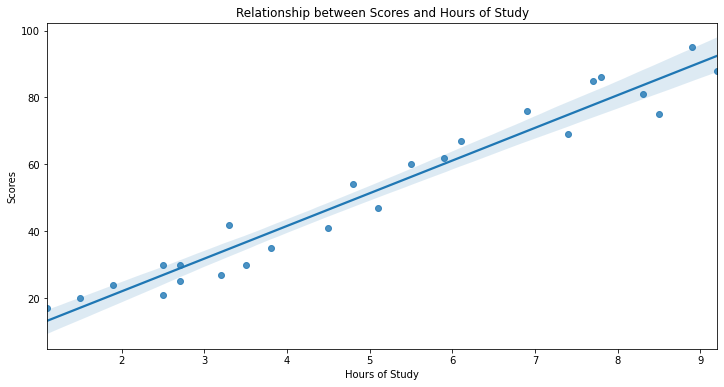

In [69]:
# Regression Plot

fig, ax = plt.subplots(figsize=(12,6)) 
scat = sns.regplot(x = df["Hours"], y = df["Scores"], fit_reg = True, data = df)  
plt.xlabel("Hours of Study") 
plt.ylabel("Scores") 
plt.title("Relationship between Scores and Hours of Study")
    
    
# Covariance

covariance = np.cov(df["Scores"], df["Hours"]) 
if covariance.all() >= 1:
    print("\n\tThere is a Positive Correlation as both values change in the same direction") 
else :
    print("\n\tThere is a Negative Correlation as both values change in the opposite direction")
        
        
# Pearson's Correlation

corr, p_value = sps.pearsonr(df["Scores"], df["Hours"]) 
print("\n\tPearson's Correlation Coeffecient : ", corr)
print("\tAssociated P-Value : ", p_value)

if corr > 0.666 :
    print("\n\tThere is a Strong Relationship between 'Scores' and 'Hours of Study' since the Correlation Coffecient is closer to 1\n\n") 
elif (corr >= 0.333) & (corr <= 0.666) : 
    print("\n\tThere is a Moderately Strong Relationship between 'Scores' and 'Hours of Study'\n\n")
elif (corr < 0.333) :
    print("\n\tThere is a Weak Relationship between 'Scores' and 'Hours of Study' since the Correlation Coffecient is closer to 0\n\n")

# Linear Regression

### Preparing Data and dividing into Attributes and Labels

In [70]:
X = df.iloc[:, :-1].values  # Explanatory Variable (Hours of study)
y = df.iloc[:, 1].values  # Response Variable (Test Scores)


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 


### Training the Model

In [72]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression()

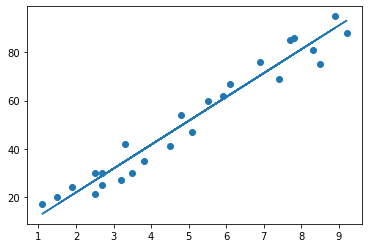

In [73]:
# Plotting the regression line
line = regressor.coef_ * X + regressor.intercept_

# Plotting the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### Predictions

In [74]:
y_pred = regressor.predict(X_test) # Predicting the scores

In [75]:
# Comparing Actual vs Predicted

pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
pred_df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [76]:
# Own Predictions

hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


### Mean Absolute Error

In [77]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975


# Ordinary Least Squares Regression

In [78]:
linear_reg = smf.ols('Scores ~ Hours', data = df).fit() 
print_summary = print(linear_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Mon, 16 Nov 2020   Prob (F-statistic):           9.13e-17
Time:                        17:17:29   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4837      2.532      0.981      0.3

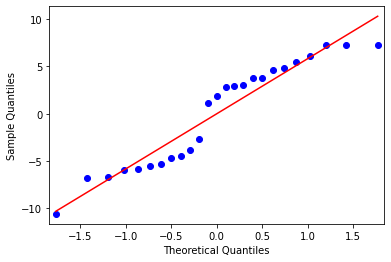

In [79]:
# Quantile-Quantile Plot

fig = sm.qqplot(linear_reg.resid, line='r')